# Graphs

A graph is a set of vertices and edges that connect those vertices

> All trees are graphs, but not all graphs are trees

This graph 
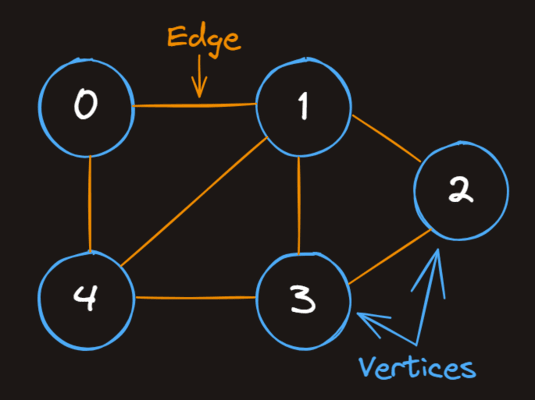

is represented by this list of lists as a matrix, where any **`True`** cell corresponds to two vertices connected by an edge

[
  [False, True, False, False, True],
  [True, False, True, True, True],
  [False, True, False, True, False],
  [False, True, True, False, True],
  [True, True, False, True, False]
]

## **`Graph class`**

In [19]:
class Graph:
    def __init__(self, num_vertices):
        self.graph = []
        for vertex in range(num_vertices):
            self.graph += [[False for n in range(num_vertices)]]
    def add_edge(self, u, v):
        #u and v are two vertices
        #first true
        row = self.graph[u]
        row[v] = True
        #second true
        column = self.graph[v]
        column[u] = True

graph = Graph(6)
edges_to_add = [(0, 1), (2, 4), (2, 1), (3, 1), (4, 5),]
for edge in edges_to_add:
        graph.add_edge(edge[0], edge[1])
        print(f"Added edge: {edge}")
print(graph.graph)

Added edge: (0, 1)
Added edge: (2, 4)
Added edge: (2, 1)
Added edge: (3, 1)
Added edge: (4, 5)
[[False, True, False, False, False, False], [True, False, True, True, False, False], [False, True, False, False, True, False], [False, True, False, False, False, False], [False, False, True, False, False, True], [False, False, False, False, True, False]]


## Adjacency List

A more appropriate way to represent a graph is using **`adjacency lists`**, which stores a list of vertices for each vertex that indicates where the connections are:

**`adjacency lists`** = {

    0: {1, 4}, 
    
    1: {0, 2, 3, 4},
    
    2: {1, 3},
    
    3: {1, 2, 4},
    
    4: {0, 1, 3}
}

In [29]:
class Graph:
    def __init__(self):
        self.graph = {}

    def add_edge(self, u, v):
        if u not in self.graph:
            #each vertex maps to a set of all other vertices they share an edge with
            self.graph[u] = {v}
        if v not in self.graph:
            self.graph[v] = {u}
            
        self.graph[u].add(v)
        self.graph[v].add(u)
        
    #returns a set of all adjacent nodes 
    def adjacent_nodes(self, node):
        return self.graph[node]

    def unconnected_vertices(self):
        unconnected = [] 
        for node in self.graph:
            if self.graph[node] == set():
                unconnected.append(node)
        return unconnected

    def add_node(self, u):
        if u not in self.graph:
            self.graph[u] = set()

graph = Graph()
edges_to_add = [(0, 1), (2, 4), (2, 1), (3, 1), (4, 5),]

for i in range(40, 45):
    graph.add_node(i)

for edge in edges_to_add:
    graph.add_edge(edge[0], edge[1])
    print(f"Added edge: {edge}")
    
print(f"\nFinal Adjacency list:\n\n{graph.graph}")
print(f"\nSet of all the nodes connected to node 1: {graph.adjacent_nodes(1)}")
print(f"Unconnected vertices: {graph.unconnected_vertices}")

Added edge: (0, 1)
Added edge: (2, 4)
Added edge: (2, 1)
Added edge: (3, 1)
Added edge: (4, 5)

Final Adjacency list:

{40: set(), 41: set(), 42: set(), 43: set(), 44: set(), 0: {1}, 1: {0, 2, 3}, 2: {1, 4}, 4: {2, 5}, 3: {1}, 5: {4}}

Set of all the nodes connected to node 1: {0, 2, 3}
Unconnected vertices: <bound method Graph.unconnected_vertices of <__main__.Graph object at 0x7e1a3a130f20>>
